## Gathering Data

In [80]:
import requests
import os

In [81]:
import pandas as pd
df1=pd.read_csv('twitter-archive-enhanced.csv')
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Gather image prediction file

In [83]:
folder_name='image'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [84]:
response

<Response [200]>

In [86]:
with open(os.path.join(folder_name,'image_predictions.tsv'),mode='wb') as file:
    file.write(response.content)

In [87]:
os.listdir(folder_name)

['image_predictions.tsv']

In [88]:
import pandas as pd
image=pd.read_csv('image/image_predictions.tsv',sep='\t')
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [89]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Gather data thru API

In [90]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [91]:
id_of_tweet=df1.tweet_id
id_of_tweet=id_of_tweet.tolist()

In [93]:
id_of_tweet[0]

892420643555336193

good=[]
id=892420643555336193
tweet = api.get_status(id,tweet_mode='extended')
tweet._json

with open('data.txt','w') as f:
    json.dump(tweet._json,f)

with open('data.txt','a') as f:
    f.write('\n')

### Writing JSON file

In [94]:
import json


good_id=[]
error_id=[]
tweet = api.get_status(id_of_tweet[0],tweet_mode='extended')
with open('tweet_json.txt','w') as f:
    json.dump(tweet._json,f)
good_id.append(id_of_tweet[0])

for tweet_id in id_of_tweet[1:]:
    
    #"try-except" block
    
    try:
        tweet = api.get_status(tweet_id,tweet_mode='extended')
        
        with open('tweet_json.txt','a') as f:
            json.dump(tweet._json,f)
            f.write('\n')
        good_id.append(tweet_id)
    except Exception as e: # catch *all* exceptions
        with open('tweet_json.txt','a') as f:
            f.write('\n')
        error_id.append(tweet_id)

### Reading JSON file and convert it to data frame 
Columns: 'id' 'created_at' 'retweet_count' 'favorite_count'

In [95]:

with open('tweet_json.txt') as f:
    lines=f.readlines()
    


In [96]:
df = pd.DataFrame(columns=['id','created_at','full_text','retweet_count','favorite_count'])
error_id=[]
for line in lines:
    try:
        line_j=json.loads(line)
        df = df.append({'id': line_j['id'],'created_at':line_j['created_at'],'full_text':line_j['full_text'],
                    'retweet_count':line_j['retweet_count'],'favorite_count':line_j['favorite_count']},ignore_index=True)
    except Exception as e:
        error_id.append(line_j['id'])
    

In [97]:
df.to_csv('extend_info.csv',index=False)

## Assessing Data (Quality)

Assessing df1-basic data

Visual assess:
- There are many retweets(starts from 'RT' in the text)
- There are missing data for dogs' name.
- There are several ratings extracted wrongly from the text.
id: 835246439529840000, 
666287406224695000


Programming assess:

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [99]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [100]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1579,687312378585812992,NaN,NaN,2016-01-13 16:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""You got any games on your phone"" 7/10 for inv...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/687312378...,7,10,None,None,None,pupper,None
199,854120357044912130,NaN,NaN,2017-04-17 23:52:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854120357...,14,10,None,None,None,pupper,None
1742,679462823135686656,NaN,NaN,2015-12-23 00:45:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hurley. He's the curly one. He hugs every...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
2280,667393430834667520,NaN,NaN,2015-11-19 17:26:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fwed. He is a Canadian Asian Taylormad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667393430...,8,10,Fwed,None,None,None,None
559,803276597545603072,NaN,NaN,2016-11-28 16:37:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,None,None,None,None
837,767754930266464257,NaN,NaN,2016-08-22 16:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Philbert. His toilet broke and he does...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767754930...,11,10,Philbert,None,None,None,None
1516,690959652130045952,NaN,NaN,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This golden is happy to refute the soft mouth ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690959652...,11,10,None,None,None,None,None
857,763956972077010945,7.638652e+17,1.584641e+07,2016-08-12 04:35:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@TheEllenShow I'm not sure if you know this bu...,NaN,NaN,NaN,NaN,12,10,None,doggo,None,None,None
208,852311364735569921,NaN,NaN,2017-04-13 00:03:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wiggles. She would like you to spot he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852311364...,13,10,Wiggles,None,None,None,None


In [101]:
df1[df1['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


After checking the number of values, the statistics and the data type. Here are some findings:


- 'rating_denominator' can never be 0.
- timestamp should be datetime type instead of string.
- dogs' names can not be 'None','a', 'an' or 'the'.


Assessing df-data from API

Based on same process, here are what I found:
- There are many retweet.
- 'created_at' should be date type.
- All of the three data set contain id, but have different name. df['id'], df1['tweet_id'],image['tweet_id'].

In [103]:
df=pd.read_csv('extend_info.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
id                2331 non-null int64
created_at        2331 non-null object
full_text         2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3), object(2)
memory usage: 91.1+ KB


In [104]:
df.head()

,id,created_at,full_text,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,7410,35146
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,5515,30413
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,3640,22862
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,7589,38421
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,8163,36674


In [105]:
df[df['id'].duplicated()]

,id,created_at,full_text,retweet_count,favorite_count


In [106]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [107]:
image[image.p1.isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [108]:
image[image['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Assessing Data(Tidiness)


- df1 has several columns for dog stage.
- We don't need all these three tables.

## Assessing Summary: 

#### Assessing df1-basic data

- There are many retweets('RT' in the text)
- Retweet-related columns are not necessary.
- There are missing data for dogs' name. And dogs' names can not be 'None','a', 'an' or 'the'.
- There are several ratings extracted wrongly from the text. id: 835246439529840000, 666287406224695000
- 'rating_denominator' can never be 0.
- Timestamp should be datetime type instead of string.
- `None` in doggo, floofer, pupper, puppo columns is treated as a non-null value. This should be converted to null `np.nan`.
- All 'tweet_id' should be string type.

#### Assessing df-data from API

- There are many retweet.
- 'created_at' should be datetime.
- All of the three data set contain id, but have different name. df['id'], df1['tweet_id'],image['tweet_id'].


#### Tidiness

- df1 has several columns for dog stage.
- We don't need all these three tables.


## Cleaning Data

In [109]:
df1_clean=df1.copy()
df_clean=df.copy()
image_clean=image.copy()

### 1. Retweets in `df1` and `df`

#### Define

Select the tweets that do not contain 'RT' in the tweet text.

#### Code

In [110]:
df1_clean=df1_clean[~df1_clean.text.str.contains('RT')]

In [111]:
df_clean=df_clean[~df_clean.full_text.str.contains('RT')]

#### Test

In [112]:
df_clean[df_clean.full_text.str.contains('RT')]

,id,created_at,full_text,retweet_count,favorite_count


In [113]:
df1_clean[df1_clean.text.str.contains('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 2. Improper data type in `df1` and `df`

#### Define

Convert date from string to datetime

#### Code

In [114]:
import datetime
df_clean['created_at']=pd.to_datetime(df['created_at'])


In [115]:
df1_clean['timestamp']=pd.to_datetime(df1['timestamp'])


#### Test

In [116]:
print(df_clean.info())
print(df1_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2330
Data columns (total 5 columns):
id                2157 non-null int64
created_at        2157 non-null datetime64[ns]
full_text         2157 non-null object
retweet_count     2157 non-null int64
favorite_count    2157 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 101.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2164 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2164 non-null datetime64[ns]
source                        2164 non-null object
text                          2164 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2106 non-null object
rat

### 3. Wrong extrated ratings in `df1`

#### Define

Filter those ids whose rating_denominator is 0 and rewrite the ratings manually based on the ratings mentioned in full_text.

#### Code

In [117]:
df1_clean[(df1_clean.tweet_id==666287406224695000) | (df1_clean.tweet_id==835246439529840000)]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Seems these two id are retweet and have already been dropped.

In [118]:
df1_clean[df1_clean['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


tweet_0 = api.get_status(835246439529840640,tweet_mode='extended')
tweet_0._json['full_text']

In [119]:
df1_clean.loc[df1_clean.tweet_id==835246439529840640,['rating_denominator']]=10

In [120]:
df1_clean.loc[df1_clean.tweet_id==835246439529840640,['rating_numerator']]=13


#### Test

In [121]:
df1_clean.loc[df1_clean.tweet_id==835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


### 4. Retweet related columns in `df1_clean` are not necessary any more.

#### Define

Drop several columns and keep 'tweet_id','rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo'

#### Code

In [122]:
df1_clean_core=df1_clean[['tweet_id','rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo']]

#### Test

In [123]:
df1_clean_core.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,13,10,Phineas,None,None,None,None
1,892177421306343426,13,10,Tilly,None,None,None,None
2,891815181378084864,12,10,Archie,None,None,None,None
3,891689557279858688,13,10,Darla,None,None,None,None
4,891327558926688256,12,10,Franklin,None,None,None,None


### 5. `None` in dog stage columns

#### Define

`None` in doggo, floofer, pupper, puppo columns is treated as a non-null value. This should be converted to null `np.nan`.

#### Code

In [124]:
import numpy as np
df1_clean_core.replace('None', np.nan, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


#### Test

In [125]:
df1_clean_core.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,12,10,Franklin,NaN,NaN,NaN,NaN


### 6. Dog stage in `df1` is untidy

#### Define

Melt the several columns related to dog stage into one column called 'stage', and drop the duplicates.

#### Code

In [126]:
# Melt the dog stage

df1_clean_core = pd.melt(df1_clean, id_vars=['tweet_id', 'rating_numerator', 'rating_denominator', 'name'],
                    value_vars=['doggo','floofer','pupper','puppo'],
                           value_name='stage')

In [127]:
df1_clean_core.head()

,tweet_id,rating_numerator,rating_denominator,name,variable,stage
0,892420643555336193,13,10,Phineas,doggo,None
1,892177421306343426,13,10,Tilly,doggo,None
2,891815181378084864,12,10,Archie,doggo,None
3,891689557279858688,13,10,Darla,doggo,None
4,891327558926688256,12,10,Franklin,doggo,None


In [128]:
df1_clean_core.drop('variable',axis=1,inplace=True)


In [129]:
df1_clean_core=df1_clean_core.drop_duplicates()

#### Test

In [130]:
df1_clean_core[df1_clean_core.duplicated()]

,tweet_id,rating_numerator,rating_denominator,name,stage


In [131]:
df1_clean_core.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 7393
Data columns (total 5 columns):
tweet_id              2518 non-null int64
rating_numerator      2518 non-null int64
rating_denominator    2518 non-null int64
name                  2518 non-null object
stage                 2518 non-null object
dtypes: int64(3), object(2)
memory usage: 118.0+ KB


### 7. Keep consistency on tweet id

#### Define

Rename 'id' in `df_clean` to 'tweet_id'

#### Code

In [132]:
df_clean=df_clean.rename(columns={'id':'tweet_id'})

#### Test

In [133]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id          2157 non-null int64
created_at        2157 non-null datetime64[ns]
full_text         2157 non-null object
retweet_count     2157 non-null int64
favorite_count    2157 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 101.1+ KB


### 8. Dog name shouldn't be 'a''an' in `df1_clean_core`

#### Define

Drop the rows that dog names are lower case letter

#### Code

In [134]:
df1_clean_core=df1_clean_core[df1_clean_core['name'].str.match('^[A-Z][a-z]')== True]
df1_clean_core.replace('None', np.nan, inplace=True)

#### Test

In [135]:
df1_clean_core.name

0         Phineas
1           Tilly
2          Archie
3           Darla
4        Franklin
5             NaN
6             Jax
7             NaN
8            Zoey
9          Cassie
10           Koda
11          Bruno
12            NaN
13            Ted
14         Stuart
15         Oliver
16            Jim
17           Zeke
18        Ralphus
19         Gerald
20        Jeffrey
22         Canela
23            NaN
24            NaN
25           Maya
26         Mingus
27          Derek
28         Roscoe
29            NaN
30        Waffles
          ...    
6133        Scott
6140         Jazz
6147         Rolf
6153         Opal
6155        Bubba
6504          NaN
6506       Stuart
6559       Snoopy
6577    Sebastian
6606       Shikha
6637          NaN
6656          NaN
6825          NaN
6827        Pablo
6839          NaN
6857       Oliver
6950        Diogi
6959         Loki
7009         Lily
7025        Betty
7045        Tonks
7055          NaN
7066     Reginald
7087          NaN
7242      

### 9. id datatype

#### Define

Convert 'tweet_id' from int to string type

#### Code

In [138]:
df1_clean_core['tweet_id']=df1_clean_core['tweet_id'].astype('str')
df_clean['tweet_id']=df_clean['tweet_id'].astype('str')
image_clean['tweet_id']=image_clean['tweet_id'].astype('str')

#### Test

In [140]:
print(df1_clean_core.info())
print(df_clean.info())
print(image_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 0 to 7393
Data columns (total 5 columns):
tweet_id              2396 non-null object
rating_numerator      2396 non-null int64
rating_denominator    2396 non-null int64
name                  1570 non-null object
stage                 339 non-null object
dtypes: int64(2), object(3)
memory usage: 112.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id          2157 non-null object
created_at        2157 non-null datetime64[ns]
full_text         2157 non-null object
retweet_count     2157 non-null int64
favorite_count    2157 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 101.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_c

### 10. Reorganize the three dataset based on 'tweet_id'

#### Define

Merge the three dataset into one dataset called 'df_master2'

#### Code

In [141]:
df_master=df_clean.merge(df1_clean_core,on='tweet_id',how='inner')

In [144]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2388 entries, 0 to 2387
Data columns (total 9 columns):
tweet_id              2388 non-null object
created_at            2388 non-null datetime64[ns]
full_text             2388 non-null object
retweet_count         2388 non-null int64
favorite_count        2388 non-null int64
rating_numerator      2388 non-null int64
rating_denominator    2388 non-null int64
name                  1562 non-null object
stage                 338 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 186.6+ KB


In [145]:
df_master2=df_master.merge(image_clean,on='tweet_id',how='inner')


In [147]:
df_master2.to_csv('twitter_archive_master.csv',index=False)

#### Test

In [148]:
df_master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 0 to 2179
Data columns (total 20 columns):
tweet_id              2180 non-null object
created_at            2180 non-null datetime64[ns]
full_text             2180 non-null object
retweet_count         2180 non-null int64
favorite_count        2180 non-null int64
rating_numerator      2180 non-null int64
rating_denominator    2180 non-null int64
name                  1516 non-null object
stage                 302 non-null object
jpg_url               2180 non-null object
img_num               2180 non-null int64
p1                    2180 non-null object
p1_conf               2180 non-null float64
p1_dog                2180 non-null bool
p2                    2180 non-null object
p2_conf               2180 non-null float64
p2_dog                2180 non-null bool
p3                    2180 non-null object
p3_conf               2180 non-null float64
p3_dog                2180 non-null bool
dtypes: bool(3), datetime64[ns](1)

## Analyzing and Visualizing Data

In [149]:
df_m=pd.read_csv('twitter_archive_master.csv')
df_m.head()

,tweet_id,created_at,full_text,retweet_count,favorite_count,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,7410,35146,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,5515,30413,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,3640,22862,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,7589,38421,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,8163,36674,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [150]:
df_m.describe()

,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,2.180000e+03,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2.180000e+03,2.180000e+03
mean,7.388023e+17,2520.385321,8476.647706,12.129817,10.398624,1.216972,0.598246,1.340645e-01,5.945405e-02
std,6.744270e+16,4720.057544,12700.262264,39.461801,6.050294,0.578953,0.272139,1.014330e-01,5.081823e-02
min,6.660209e+17,11.000000,69.000000,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.781969e+17,580.500000,1970.250000,10.000000,10.000000,1.000000,0.368107,5.300115e-02,1.552053e-02
50%,7.120892e+17,1210.500000,3839.000000,11.000000,10.000000,1.000000,0.598094,1.155410e-01,4.848585e-02
75%,7.931846e+17,2784.000000,10453.000000,12.000000,10.000000,1.000000,0.850050,1.943738e-01,9.099157e-02
max,8.924206e+17,74793.000000,151151.000000,1776.000000,150.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [151]:
import datetime
df_m['created_at']=pd.to_datetime(df_m['created_at'])
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2180 entries, 0 to 2179
Data columns (total 20 columns):
tweet_id              2180 non-null int64
created_at            2180 non-null datetime64[ns]
full_text             2180 non-null object
retweet_count         2180 non-null int64
favorite_count        2180 non-null int64
rating_numerator      2180 non-null int64
rating_denominator    2180 non-null int64
name                  1516 non-null object
stage                 302 non-null object
jpg_url               2180 non-null object
img_num               2180 non-null int64
p1                    2180 non-null object
p1_conf               2180 non-null float64
p1_dog                2180 non-null bool
p2                    2180 non-null object
p2_conf               2180 non-null float64
p2_dog                2180 non-null bool
p3                    2180 non-null object
p3_conf               2180 non-null float64
p3_dog                2180 non-null bool
dtypes: bool(3), datetime64[ns](1),

In [152]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

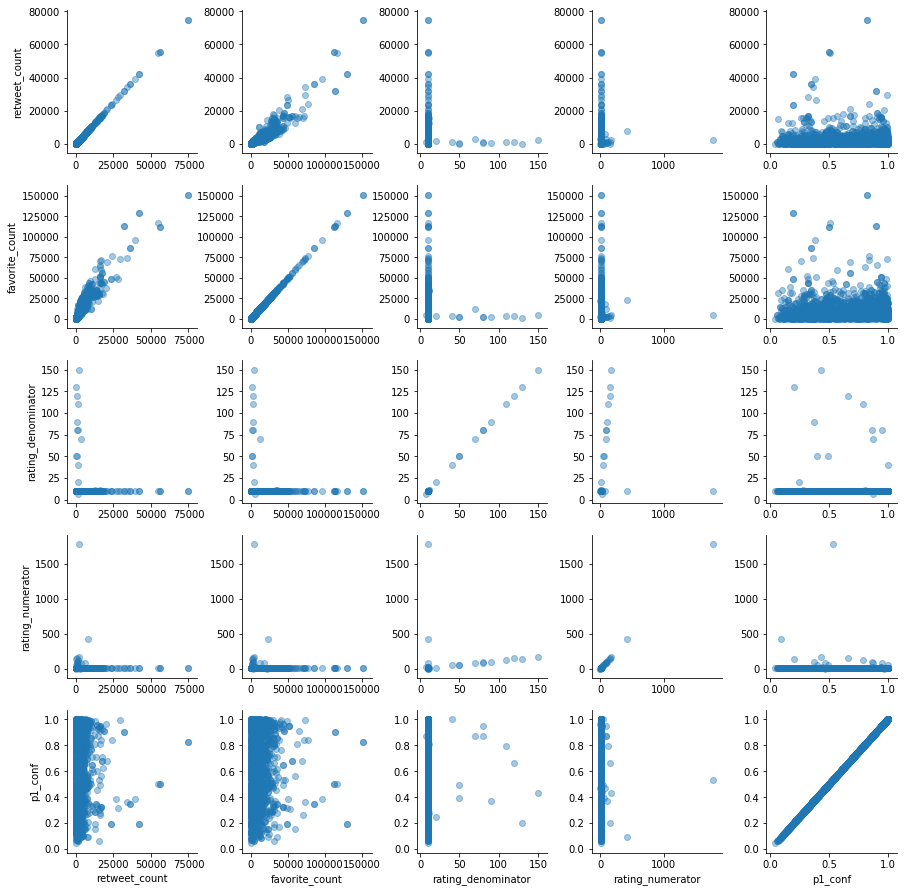

In [153]:
df_m_stats=['retweet_count','favorite_count','rating_denominator','rating_numerator','p1_conf']
g=sb.PairGrid(data=df_m,vars=df_m_stats)
g.map(plt.scatter,alpha=0.4);

Text(0.5,1,'favorite_count and ratings')

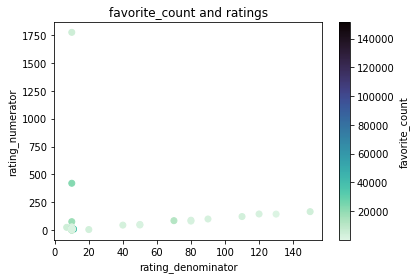

In [154]:

plt.scatter(data=df_m,x='rating_denominator',y='rating_numerator',c='favorite_count',cmap='mako_r');

plt.xlabel('rating_denominator')
plt.ylabel('rating_numerator')
plt.colorbar(label='favorite_count')
plt.title('favorite_count and ratings')

In [155]:
xbin_edges=np.arange(df_m['favorite_count'].min(),40000,2000)
ybin_edges=np.arange(df_m['retweet_count'].min(),20000,500)


In [156]:
xbin_idxs = pd.cut(df_m['favorite_count'], xbin_edges, right = False,
                    include_lowest = True, labels = False)
ybin_idxs = pd.cut(df_m['retweet_count'], ybin_edges, right = False,
                    include_lowest = True, labels = False)

Text(0.5,1,'number of favorite_count and retweet_count')

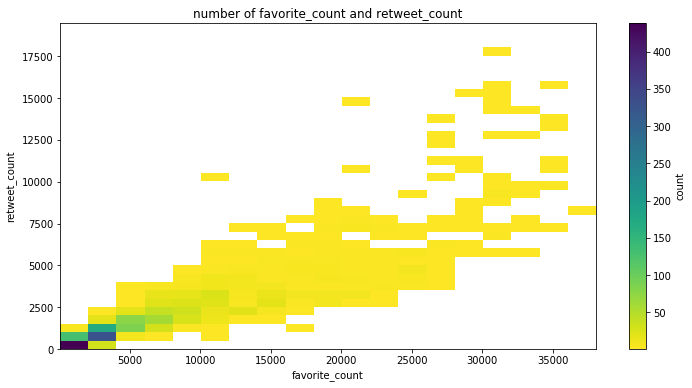

In [157]:
plt.figure(figsize=(12,6))
plt.hist2d(data = df_m, x = 'favorite_count', y = 'retweet_count',
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.colorbar(label = 'count');
plt.legend()
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('number of favorite_count and retweet_count')

Text(0.5,1,'prediction result and favorite_count')

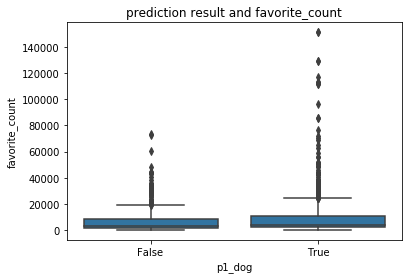

In [158]:
# use boxplot to show how spread the fav and retweet count are
base_color=sb.color_palette()[0]
sb.boxplot(data=df_m,x='p1_dog',y='favorite_count',color=base_color).set_title('prediction result and favorite_count')


### Retweet and favorite count have a positive relationship.

Text(0.5,1,'rating_numerator and favorite_count')

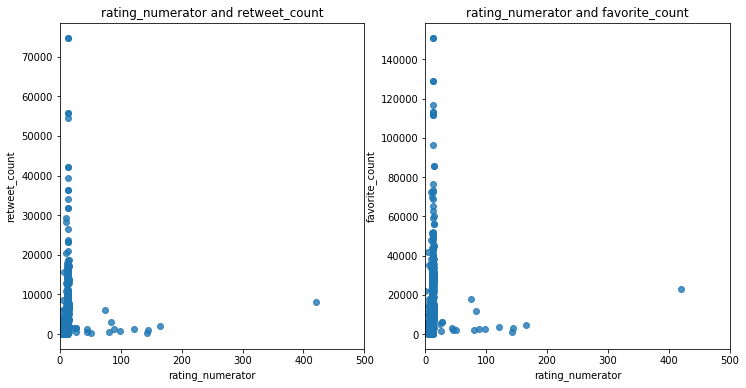

In [159]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

sb.regplot(data=df_m,x='rating_numerator',y='retweet_count',x_jitter=0.3,fit_reg=False);
plt.xlim([0,500])
plt.title('rating_numerator and retweet_count')
plt.subplot(1,2,2)
sb.regplot(data=df_m,x='rating_numerator',y='favorite_count',x_jitter=0.3,fit_reg=False);
plt.xlim([0,500])
plt.title('rating_numerator and favorite_count')

Text(0.5,1,'rating_numerator under 20 and favorite_count')

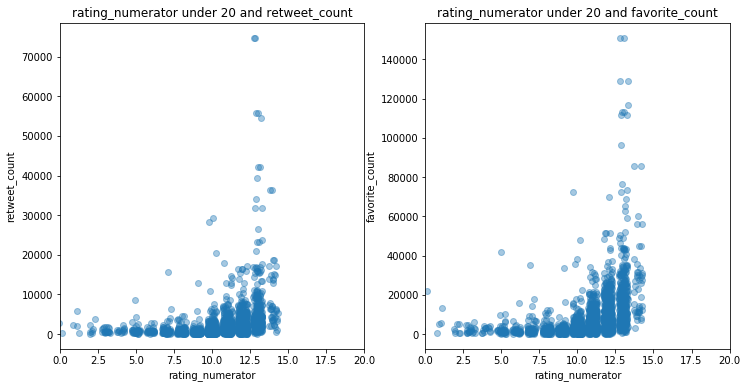

In [160]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.regplot(data=df_m,x='rating_numerator',y='retweet_count',x_jitter=0.3,scatter_kws={'alpha':0.4},fit_reg=False);
plt.xlim([0,20])
plt.title('rating_numerator under 20 and retweet_count')
plt.subplot(1,2,2)
sb.regplot(data=df_m,x='rating_numerator',y='favorite_count',x_jitter=0.3,scatter_kws={'alpha':0.4},fit_reg=False);
plt.xlim([0,20])
plt.title('rating_numerator under 20 and favorite_count')

### retweet_count surges when the numerator goes up. But when the numerator is bigger than 15, the trend disappear.

Text(0.5,1,'dog prediction result and confidence level')

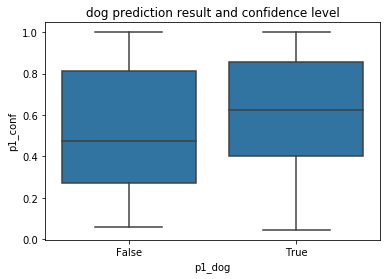

In [161]:
#prediction confidence
base_color=sb.color_palette()[0]
sb.boxplot(data=df_m,x='p1_dog',y='p1_conf',color=base_color).set_title('dog prediction result and confidence level')


### 'True' prediction has a higher confidence level than 'false' prediction.

In [162]:
# year, favorite_count and p1_dog
df_m['year'], df_m['month'] = df_m['created_at'].dt.year, df_m['created_at'].dt.month

In [163]:
df_m['year']=df_m['year'].astype('category')
df_m[df_m['favorite_count'].isnull()]

,tweet_id,created_at,full_text,retweet_count,favorite_count,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,year,month


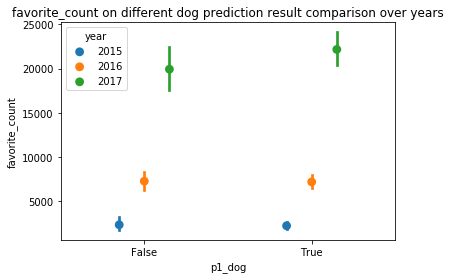

In [164]:
ax = sb.pointplot(data = df_m, x = 'p1_dog', y = 'favorite_count', hue = 'year',
                  dodge = 0.3, linestyles = "").set_title('favorite_count on different dog prediction result comparison over years')

### The mean of favorite_count increased significantly during the past three years, from 2015 to 2017. There's no big difference between false and true predition. But 'false' prediction seems to have larger deviation around the mean, which means the 'false' predition (the pictures are usually not focusing on the dog, but other stuff, like a orange) some people don't like this kind of pictures.

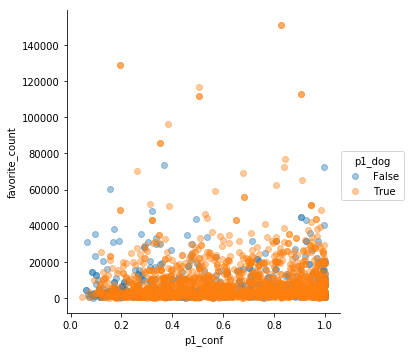

In [165]:
g=sb.FacetGrid(data = df_m, hue = 'p1_dog', size = 5)
g.map(plt.scatter,'p1_conf','favorite_count',alpha=0.4)
g.add_legend()
# No trend

#why I can't use heatmap to see the count?
sb.heatmap(df_sub,fmt="d")